<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/Word_Frequency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import operator
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import os



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Access the file for analysis


In [3]:
from google.colab import files
uploaded=files.upload()


Saving independence day speech.txt to independence day speech.txt


In [0]:
with open(os.getcwd()+ "/independence day speech.txt", encoding='cp1252') as fh: 
    filedata = fh.read()

In [0]:
#magic commands to see multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
#Print first 500 characters in the file
print("Data read from file : ", filedata[0:500] )

Data read from file :  My dear countrymen, I convey my best wishes to all of you on this auspicious occasion of Independence Day. Today, the country is brimming with self-confidence. The country is scaling new heights by working extremely hard, with a resolve to realize its dreams. Today’s dawn has brought a new spirit, a new enthusiasm, a new zeal and a new energy with it.

My dear countrymen, in our country, there is a Neelakurinji flower which blooms once every 12 years. This year, Neelakurinji is in full bloom on 


In [7]:
import nltk
nltk.download('punkt')
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
corpus=PlaintextCorpusReader(os.getcwd(),"independence day speech.txt",encoding='cp1252')
print(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<PlaintextCorpusReader in '/content'>


In [8]:
print("Files in this corpus : ", corpus.fileids())

Files in this corpus :  ['independence day speech.txt']


In [9]:
paragraphs=corpus.paras()
print("\n Total paragraphs in this corpus : ", len(paragraphs))


 Total paragraphs in this corpus :  128


In [10]:
sentences=corpus.sents()
print("\n Total sentences in this corpus : ", len(sentences))


 Total sentences in this corpus :  627


## Tokenization


In [11]:
token = nltk.word_tokenize(filedata)
print("Token : ",token[:20])
print("\n Total Tokens : ",len(token))

Token :  ['My', 'dear', 'countrymen', ',', 'I', 'convey', 'my', 'best', 'wishes', 'to', 'all', 'of', 'you', 'on', 'this', 'auspicious', 'occasion', 'of', 'Independence', 'Day']

 Total Tokens :  9637


<FreqDist with 2058 samples and 9637 outcomes>
[('?', 560), ('the', 492), (',', 440), ('.', 429), ('of', 279), ('to', 247), ('and', 221), ('in', 158), ('a', 134), ('is', 133), ('have', 100), ('are', 87), ('our', 85), ('we', 80), ('that', 78), ('country', 74), ('for', 72), ('with', 59), ('has', 56), ('this', 55), ('I', 54), ('will', 48), ('it', 47), ('on', 43), ('from', 42)]


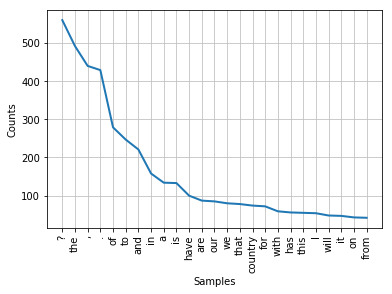

In [12]:
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Cleaning of file

### Remove Punctuation

In [14]:
#Use the Punkt library to extract tokens
token_1 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token))
print("Tokens after removing punctuation : ",token_1[:20])
print("\nTotal tokens after removing punctuation : ", len(token_1))

Tokens after removing punctuation :  ['My', 'dear', 'countrymen', 'I', 'convey', 'my', 'best', 'wishes', 'to', 'all', 'of', 'you', 'on', 'this', 'auspicious', 'occasion', 'of', 'Independence', 'Day', 'Today']

Total tokens after removing punctuation :  8074


### Normalization

In [15]:
token_2=[word.lower() for word in token_1 ]
print("Token list after converting to lower case : ", token_2[:20])
print("\nTotal tokens after converting to lower case : ", len(token_2))

Token list after converting to lower case :  ['my', 'dear', 'countrymen', 'i', 'convey', 'my', 'best', 'wishes', 'to', 'all', 'of', 'you', 'on', 'this', 'auspicious', 'occasion', 'of', 'independence', 'day', 'today']

Total tokens after converting to lower case :  8074


In [16]:
#Download the standard stopword list
nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
token_3 = list(filter(lambda token: token not in stopwords.words('english'), token_2))
print("Token list after removing stop words : ", token_3[:20])
print("\nTotal tokens after removing stop words : ", len(token_3))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Token list after removing stop words :  ['dear', 'countrymen', 'convey', 'best', 'wishes', 'auspicious', 'occasion', 'independence', 'day', 'today', 'country', 'brimming', 'self-confidence', 'country', 'scaling', 'new', 'heights', 'working', 'extremely', 'hard']

Total tokens after removing stop words :  4182


## Stemming

In [17]:
#Use the PorterStemmer library for stemming.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#Stem data
token_4 = [stemmer.stem(word) for word in token_3 ]
print("Token list after stemming : ", token_4[:20])
print("\nTotal tokens after Stemming : ", len(token_4))

Token list after stemming :  ['dear', 'countrymen', 'convey', 'best', 'wish', 'auspici', 'occas', 'independ', 'day', 'today', 'countri', 'brim', 'self-confid', 'countri', 'scale', 'new', 'height', 'work', 'extrem', 'hard']

Total tokens after Stemming :  4182


## Lemmatization

In [18]:
#Use the wordnet library to map words to their lemmatized form
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
token_5 = [lemmatizer.lemmatize(word) for word in token_3]
print("Token list after Lemmatization : ", token_5[:20])
print("\nTotal tokens after Lemmatization : ", len(token_5))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Token list after Lemmatization :  ['dear', 'countryman', 'convey', 'best', 'wish', 'auspicious', 'occasion', 'independence', 'day', 'today', 'country', 'brimming', 'self-confidence', 'country', 'scaling', 'new', 'height', 'working', 'extremely', 'hard']

Total tokens after Lemmatization :  4182


In [28]:
# Form a dataframe with the 20 most commonaly used words
import pandas as pd
freq_word_df = pd.DataFrame(Freq_dist_nltk.most_common(20),columns = ['Words','Freq'])
freq_word_df

,Words,Freq
0,country,76
1,sister,45
2,today,43
3,brother,43
4,new,42
5,india,41
6,people,41
7,dear,39
8,poor,34
9,want,31


<FreqDist with 1662 samples and 4182 outcomes>
[('country', 76), ('sister', 45), ('today', 43), ('brother', 43), ('new', 42), ('india', 41), ('people', 41), ('dear', 39), ('poor', 34), ('want', 31), ('countryman', 30), ('time', 29), ('crore', 26), ('year', 25), ('every', 24), ('world', 24), ('also', 23), ('indian', 22), ('government', 22), ('ahead', 21)]


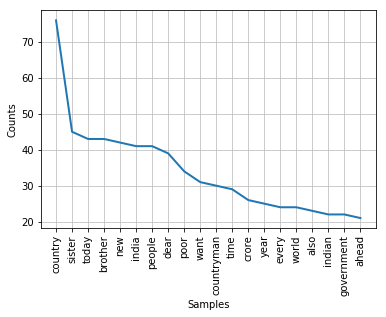

In [19]:
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_5)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:20])
Freq_dist_nltk.plot(20, cumulative=False)

In [24]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(sorted_d)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

TypeError: ignored

In [21]:
plt.figure(figsize = (15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

<Figure size 1080x720 with 0 Axes>

NameError: ignored

<Figure size 1080x720 with 0 Axes>

In [54]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(Freq_dist_nltk)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

TypeError: ignored

In [0]:
#We clean it a bit
from bs4 import BeautifulSoup
print("Calling BS4")
soup = BeautifulSoup(html, 'html.parser')

In [0]:
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract() 
#print(soup.get_text())


In [0]:
from collections import defaultdict
corpus = defaultdict(list) #Create an empty corpus
ps = PorterStemmer() # For Stemming the words to original form
stop_words = set(stopwords.words('english')) # removes words like will, i, and, it etc
#removes handles (@), numbers, urls emojis and any other special charcters to have only text
text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',soup)
# Convert all words to lower case
text_cln = tweets_text_cln.lower()
# Split sentences in to words
text_cln = text_cln.split()
# Remove english stopwords
text_cln = [x for x in text_cln if not x in stop_words]
# Lemmatize words to the base form
wn = nltk.WordNetLemmatizer()
text_cln = [wn.lemmatize(x) for x in text_cln]
# Join words to form the original sentence, but cleaned-up
text_cln = " ".join(text_cln)
#Append to the list to get all the tweets in one place
corpus.append(text_cln)
  
  

In [0]:
#Get the token
tokens = [tok for tok in soup.get_text().split()]
words = soup.get_text().split()
for word in words:
    print(word)

In [0]:
print(tokens[0:100])

# Normalization

In [0]:
def wordfreq (tokens):
    """Function to generated the frequency distribution of the
given text"""
    word_freq={}
    for tok in tokens:
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
    return word_freq

## Word Frequency Analysis

In [0]:
new_tokens = wordfreq(tokens)
new_tokens 

In [0]:
import operator
sorted_d = sorted(new_tokens.items(), key=operator.itemgetter(1),reverse=True)
#print('Dictionary in descending order by value : ',sorted_d)
print(sorted_d[:25])

In [0]:
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## StopWord Removal

In [0]:
#Download the standard stopword list
nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
token_list = list(filter(lambda token: token not in stopwords.words('english'), new_tokens))
print("Token list after removing stop words : ", token_list[:20])
print("\nTotal tokens after removing stop words : ", len(token_list))

In [0]:
Freq_dist_nltk=nltk.FreqDist(token_list)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [0]:
import nltk
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token_list)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [0]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

In [0]:
my_list = ['The','new','I','My','also','This','get']

In [0]:
wordsFiltered= []
my_list = ['The','new','I','My','also','This','get']
if word not in my_list:
        wordsFiltered.append(word)
    

In [0]:
Freq_dist_nltk=nltk.FreqDist(wordsFiltered)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items())
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [0]:
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_list)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [0]:
import pandas as pd

In [0]:
from google.colab import files
uploaded=files.upload()

In [0]:
df = pd.read_txt("independence day speech.txt")
df.info()